# Part A
#### Question 1

Given:

$\large \mu_1=(0.4, 0.8), \mu_2=(1.5, 2.7)$, $\large \Sigma = \begin{bmatrix} 1.5 & 0 \\ 0 & 0.8 \end{bmatrix}$, $\large P(\omega_1) = 0.95, P(\omega_2) = 0.05$

Calculate $\large p(x|\omega_1), p(x|\omega_2)$

#### Answer
We know that:
$\large p\left(\boldsymbol{x} \mid \omega_i\right)=\frac{1}{(2 \pi)^{d / 2}|\boldsymbol{\Sigma}|^{1 / 2}} \exp \left[-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^t \boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right]
$

So we can convert the equation to python code in order to calculate $\large p(x|\omega_1), p(x|\omega_2)$


In [18]:
# Run this cell before anything else in order to import the necessary libraries and make the necessary variable declarations
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import matplotlib

mu_1 = np.array([0.4, 0.8])
mu_2 = np.array([1.5, 2.7])

p_omega_1 = 0.95
p_omega_2 = 0.05

sigma = np.array([[1.5, 0], [0, .8]])
# x_0 = np.arange(-5,6,1)
# x_1 = np.arange(-5,6,1)
x_0 = np.arange(-10, 11, 1)
x_1 = np.arange(-10, 11, 1)
x = np.array([x_0, x_1]).transpose()
x_0, x_1 = np.meshgrid(x_0, x_1)

In [19]:
# Answer to question 1
def distribution_value(x, mu, sigma):
    d = mu.shape[0]
    if not (isinstance(x, (int, np.integer))):
        p = np.zeros(x.shape[0])
        for i in range(x.shape[0] - 1):
            p = np.append(p, 1 / (pow((2 * np.pi), (d / 2)) * np.sqrt(np.linalg.det(sigma))) * np.exp(
                -0.5 * np.matmul(np.matmul(np.transpose(x[i,:] - mu), np.linalg.inv(sigma)), (x[i,:] - mu))))
    else:
        p = 1 / (pow((2 * np.pi), (d / 2)) * np.sqrt(np.linalg.det(sigma))) * np.exp(
            -0.5 * np.matmul(np.matmul(np.transpose(x - mu), np.linalg.inv(sigma)), (x - mu)))
    return p


print(distribution_value(x, mu_1, sigma))
print(distribution_value(x, mu_2, sigma))

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.98872669e-49 2.00577906e-40 8.46779568e-33
 5.25847594e-26 4.80343209e-20 6.45424820e-15 1.27568049e-10
 3.70885971e-07 1.58613863e-04 9.97801428e-03 9.23313836e-02
 1.25677290e-01 2.51632375e-02 7.41102824e-04 3.21064777e-06
 2.04601635e-09 1.91790804e-13 2.64453125e-18 5.36379128e-24
 1.60028480e-30]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.72775828e-64 1.10994135e-54 1.04886435e-45
 1.4579

[6.63929036e-49 1.90549010e-40 8.04440589e-33 4.99555214e-26
 4.56326049e-20 6.13153579e-15 1.21189646e-10 3.52341685e-07
 1.50683293e-04 9.47928754e-03 8.77508494e-02 1.20491329e-01
 2.88255347e-02 3.94781420e-03 3.17604538e-04 4.48882158e-06
 9.41463197e-09 2.90568316e-12 1.31917702e-16 8.80968716e-22]


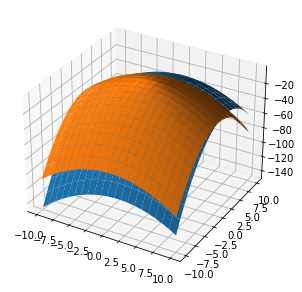

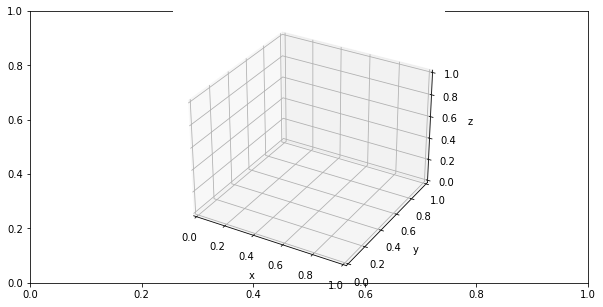

In [20]:
# Answer to question 2
def probability_distribution(x, mu_1, mu_2, sigma):
    d = mu_1.shape[0]

    probability_distrib = np.array([])

    for i in range(x.shape[0] - 1):
        for j in range(x.shape[1] - 1):
            probability_distrib = np.append(probability_distrib,
                                            distribution_value(x[i, j], mu_1, sigma) * p_omega_1 + distribution_value(
                                                x[i, j], mu_2,
                                                sigma) * p_omega_2)

    return probability_distrib


print(probability_distribution(x, mu_1, mu_2, sigma))


def discriminant_function(x_0, x_1, mu, sigma, a_priori):
    g = np.zeros([x_0.shape[0], x_0.shape[1]])

    for i in range(x_0.shape[0]):
        for j in range(x_1.shape[0]):
            g[i][j] = -0.5 * np.matmul(np.matmul(np.transpose(([x_0[i][j], x_1[i][j]] - mu)), np.linalg.inv(sigma)),
                                       ([x_0[i][j], x_1[i][j]] - mu)) + np.log(a_priori)

    return g


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x = discriminant_function(x_0, x_1, mu_2, sigma, p_omega_2)
y = discriminant_function(x_0, x_1, mu_1, sigma, p_omega_1)

fig = plt.figure()
fig.add_subplot()
surf = ax.plot_surface(x_0, x_1, x)
surf = ax.plot_surface(x_0, x_1, y)
plt.rcParams['figure.figsize'] = [10, 5]

ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


# def bayes_error(p_omega_1, p_omega_2, mu_1, mu_2, sigma):
#     case_1 = discriminant_function(x, mu_1, sigma, p_omega_1)
#     case_2 = discriminant_function(x, mu_2, sigma, p_omega_2)
#
#     # case =